this is plot not very correct as its y 'position' not y 'coordinate vs velocity

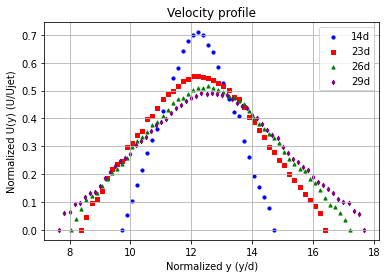

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mt

file_path = 'planerjet_data.csv'

def RemoveNaN(data):
    newData = []
    for i in data:
        if not mt.isnan(i):
            newData.append(i)
    return newData

# Loading CSV file into a DataFrame
df = pd.read_csv(file_path)

# Extracting data from y(col 2) and U(col 6) at x=14d
column_2_data = RemoveNaN(df.iloc[:, 1].values)  # Assuming columns are zero-indexed
column_6_data = RemoveNaN(df.iloc[:, 5].values)

# Extracting data from y(col 9) and U(col 13) at x=23d
column_9_data = RemoveNaN(df.iloc[:, 8].values)
column_13_data = RemoveNaN(df.iloc[:, 12].values)

# Extracting data from y(col 16) and U(col 20) at x=26d
column_16_data = RemoveNaN(df.iloc[:, 15].values)
column_20_data = RemoveNaN(df.iloc[:, 19].values)

# Extracting data from y(col 23) and U(col 27) at x=29d
column_23_data = RemoveNaN(df.iloc[:, 22].values)
column_27_data = RemoveNaN(df.iloc[:, 26].values)

# Normalize x-axis and y-axis values
uj = 50
d = 1.8

column_2_data_normalized = np.array(column_2_data) / d
column_6_data_normalized = np.array(column_6_data) / uj

column_9_data_normalized = np.array(column_9_data) / d
column_13_data_normalized = np.array(column_13_data) / uj

column_16_data_normalized = np.array(column_16_data) / d
column_20_data_normalized = np.array(column_20_data) / uj

column_23_data_normalized = np.array(column_23_data) / d
column_27_data_normalized = np.array(column_27_data) / uj

# Scatter plot for Column 2 and Column 6 at 14d
plt.scatter(column_2_data_normalized, column_6_data_normalized, marker='o', label='14d', color='b', s=10)

# Scatter plot for Column 9 and Column 13 at 23d
plt.scatter(column_9_data_normalized, column_13_data_normalized, marker='s', label='23d', color='r', s=10)

# Scatter plot for Column 16 and Column 20 at 26d
plt.scatter(column_16_data_normalized, column_20_data_normalized, marker='^', label='26d', color='g', s=10)

# Scatter plot for Column 23 and Column 27 at 29d
plt.scatter(column_23_data_normalized, column_27_data_normalized, marker='d', label='29d', color='purple', s=10)

plt.xlabel('Normalized y (y/d)')
plt.ylabel('Normalized U(y) (U/Ujet)')
plt.title('Velocity profile')
plt.legend()
plt.grid()
plt.show()


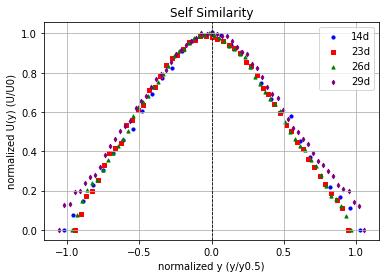

In [24]:

self_similar_plot = 'self_similar.csv'

# Loading CSV file into a DataFrame
df1 = pd.read_csv(self_similar_plot)

yRef = 36  # cm

# norm y = (y-yref)/y0.5*d , norm u = u/u0 at a particular x

# data from column 2 and column 6
norm_y_14d = df1.iloc[:, 2] - yRef  # Assuming columns are zero-indexed
norm_u_14d = df1.iloc[:, 4]

# data from column 9 and column 13
norm_half_width_23d = df1.iloc[:, 8] - yRef
norm_u0_23d = df1.iloc[:, 10]

# data from column 16 and column 20
norm_half_width_26d = df1.iloc[:, 14] - yRef
norm_u0_26d = df1.iloc[:, 16]

# data from column 23 and column 27
norm_half_width_29d = df1.iloc[:, 20] - yRef
norm_u0_29d = df1.iloc[:, 22]

# Calculate mean of normalized y-values
mean_norm_y = (
    norm_y_14d.mean(),
    norm_half_width_23d.mean(),
    norm_half_width_26d.mean(),
    norm_half_width_29d.mean()
)

# u/u0 vs y/y0.5 at 14d
plt.scatter(norm_y_14d - mean_norm_y[0], norm_u_14d, marker='o', label='14d', color='b', s=10)

# u/u0 vs y/y0.5 at 23d
plt.scatter(norm_half_width_23d - mean_norm_y[1], norm_u0_23d, marker='s', label='23d', color='r', s=10)

# u/u0 vs y/y0.5 at 26d
plt.scatter(norm_half_width_26d - mean_norm_y[2], norm_u0_26d, marker='^', label='26d', color='g', s=10)

# u/u0 vs y/y0.5 at 29d
plt.scatter(norm_half_width_29d - mean_norm_y[3], norm_u0_29d, marker='d', label='29d', color='purple', s=10)

plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at x=0 for better visualization

plt.xlabel('normalized y (y/y0.5)')
plt.ylabel('normalized U(y) (U/U0)')
plt.title('Self Similarity')
plt.legend()
plt.grid()
plt.show()


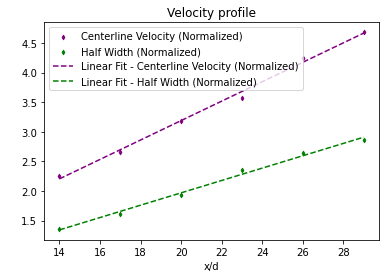

In [70]:


x_by_d = [ 14.0 , 17.0, 20.0, 23.0, 26.0, 29.0]
centerline_velo = [35.271, 32.4859, 29.6796, 28.0199, 25.7332, 24.4986]
half_width = [2.4369, 2.9086, 3.4891,  4.2296, 4.7429, 5.1359 ]

# Normalize centerline velocity
centerline_velo_normalized = np.array(centerline_velo) / 53
centerline_velo_normalized = [ pow(value, -2) for value in centerline_velo_normalized ]

# Normalize half width
half_width_normalized = np.array(half_width) / 1.8

# Scatter plot for normalized centerline velocity
plt.scatter(x_by_d, centerline_velo_normalized, marker='d', label='Centerline Velocity (Normalized)', color='purple', s=10)

# Scatter plot for normalized half width
plt.scatter(x_by_d, half_width_normalized, marker='d', label='Half Width (Normalized)', color='green', s=10)

# Linear fit for normalized centerline velocity
centerline_fit = np.polyfit(x_by_d, centerline_velo_normalized, 1)
centerline_fit_line = np.polyval(centerline_fit, x_by_d)
plt.plot(x_by_d, centerline_fit_line, "--", color='purple', label='Linear Fit - Centerline Velocity (Normalized)')

# Linear fit for normalized half width
half_width_fit = np.polyfit(x_by_d, half_width_normalized, 1)
half_width_fit_line = np.polyval(half_width_fit, x_by_d)
plt.plot(x_by_d, half_width_fit_line, "--", color='green', label='Linear Fit - Half Width (Normalized)')

plt.xlabel('x/d')
plt.ylabel(' ')
plt.title('Velocity profile')
plt.legend()
plt.show()


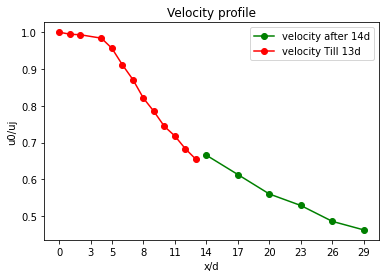

In [73]:

#plotting after 14d
centerline_velo_just_normalized = np.array(centerline_velo) / 53
plt.plot(x_by_d,centerline_velo_just_normalized , "o-", color='green', label='velocity after 14d')


#plotting till 13d
centvelo_till_13d = [53.00058756, 52.71705162, 52.63576082, 52.14535484, 50.68791061, 48.3088852, 46.17888429, 43.50507274, 41.59292347, 39.42594185, 38.04408249, 36.19840858, 34.68821277]
x_by_d_till_13 = [0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
vo_norm= np.array(centvelo_till_13d)/53
plt.plot(x_by_d_till_13, vo_norm, "o-", color='red', label='velocity Till 13d')


plt.xlabel('x/d')
plt.ylabel('u0/uj')
plt.title('Velocity profile')
plt.legend()

# Define the x locations you want to mark on the x-axis
marked_x_locations = [ 0,3, 5,  8, 11, 14, 17, 20, 23, 26, 29] # Add or modify as needed

# Set x-axis markings
plt.xticks(marked_x_locations)
plt.show()

[3.444927018584434, 6.349122162129378, 6.792827963450483, 7.27883317147825]
[0.9036938168936919, 0.9878267798513192, 0.9343311831794567, 0.916373467903731]
[4.176633096141904, 5.530737705169107, 7.321151670523131, 8.356765952153033]


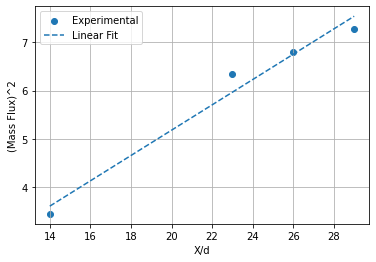

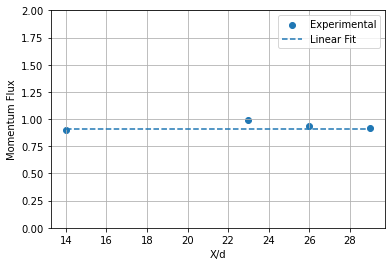

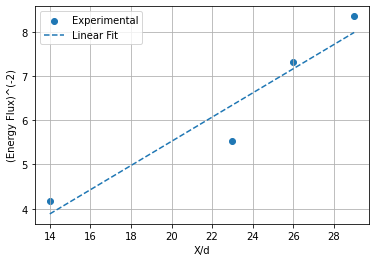

In [13]:
def Integrate(Y, dx):
    sum = 0
    for v in Y:
        sum += v * dx
    return sum

massFlux = []
momentumFlux = []
energyFlux = []

Ncolumn_6_data  = [value / 53 for value in column_6_data]
Ncolumn_13_data = [value / 53 for value in column_13_data]
Ncolumn_20_data = [value / 53 for value in column_20_data]
Ncolumn_27_data = [value / 53 for value in column_27_data]

massFlux.append( pow( Integrate( Ncolumn_6_data , 0.3 )/1.8, 2 ) )
massFlux.append( pow( Integrate( Ncolumn_13_data, 0.3 )/1.8, 2 ) )
massFlux.append( pow( Integrate( Ncolumn_20_data, 0.3 )/1.8, 2 ) )
massFlux.append( pow( Integrate( Ncolumn_27_data, 0.3 )/1.8, 2 ) )
print(massFlux)

c6  = [pow(value, 2) for value in Ncolumn_6_data]
c13 = [pow(value, 2) for value in Ncolumn_13_data]
c20 = [pow(value, 2) for value in Ncolumn_20_data]
c27 = [pow(value, 2) for value in Ncolumn_27_data]

momentumFlux.append( Integrate( c6 , 0.3 )/1.8 )
momentumFlux.append( Integrate( c13, 0.3 )/1.8 )
momentumFlux.append( Integrate( c20, 0.3 )/1.8 )
momentumFlux.append( Integrate( c27, 0.3 )/1.8 )
print(momentumFlux)

c6  = [pow(value, 3) for value in Ncolumn_6_data]
c13 = [pow(value, 3) for value in Ncolumn_13_data]
c20 = [pow(value, 3) for value in Ncolumn_20_data]
c27 = [pow(value, 3) for value in Ncolumn_27_data]

energyFlux.append( pow( Integrate( c6 , 0.3 )/1.8, -2 ) )
energyFlux.append( pow( Integrate( c13, 0.3 )/1.8, -2 ) )
energyFlux.append( pow( Integrate( c20, 0.3 )/1.8, -2 ) )
energyFlux.append( pow( Integrate( c27, 0.3 )/1.8, -2 ) )
print(energyFlux)

plt.scatter(x_by_d, massFlux, label="Experimental")
mSlope, mIntercept = np.polyfit(x_by_d, massFlux, 1)
m1 = [ value  * mSlope for value in x_by_d ]
mFit = m1  + mIntercept
plt.plot(x_by_d, mFit,"--", label="Linear Fit")
plt.xlabel("X/d")
plt.ylabel("(Mass Flux)^2")
plt.legend()
plt.grid()
plt.show()
plt.close()

plt.scatter(x_by_d, momentumFlux, label="Experimental")
mSlope, mIntercept = np.polyfit(x_by_d, momentumFlux, 1)
mSlope = 0
m1 = [ value  * mSlope for value in x_by_d ]
mFit = m1  + mIntercept
plt.plot(x_by_d, mFit,"--", label="Linear Fit")
plt.xlabel("X/d")
plt.ylabel("Momentum Flux")
plt.legend()
plt.grid()
plt.ylim([0,2])
plt.show()
plt.close()

plt.scatter(x_by_d, energyFlux, label="Experimental")
mSlope, mIntercept = np.polyfit(x_by_d, energyFlux, 1)
m1 = [ value  * mSlope for value in x_by_d ]
mFit = m1  + mIntercept
plt.plot(x_by_d, mFit,"--", label="Linear Fit")
plt.xlabel("X/d")
plt.ylabel("(Energy Flux)^(-2)")
plt.legend()
plt.grid()
plt.show()
plt.close()

#  old code for self similarity

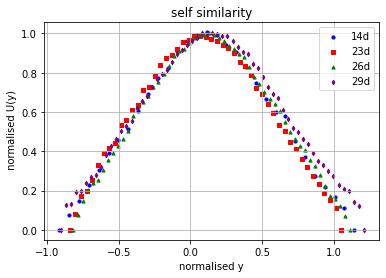

In [11]:
self_similar_plot = 'self_similar.csv'

# Loading CSV file into a DataFrame
df1 = pd.read_csv(self_similar_plot)

yRef = 36 #cm

# norm y = (y-yref)/y0.5*d , norm u = u/u0  at a particular x

# data from column 2 and column 6
norm_y_14d = df1.iloc[:, 2]  # Assuming columns are zero-indexed
norm_u_14d = df1.iloc[:, 4]

# data from column 9 and column 13
norm_half_width_23d = df1.iloc[:, 8]
norm_u0_23d = df1.iloc[:, 10]

# data from column 16 and column 20
norm_half_width_26d = df1.iloc[:, 14]
norm_u0_26d = df1.iloc[:, 16]

# data from column 23 and column 27
norm_half_width_29d = df1.iloc[:, 20]
norm_u0_29d = df1.iloc[:, 22]

# u/u0 vs y/y0.5 at 14d
plt.scatter(norm_y_14d, norm_u_14d, marker='o', label='14d', color='b', s=10)

# u/u0 vs y/y0.5 at 23d
plt.scatter(norm_half_width_23d, norm_u0_23d, marker='s', label='23d', color='r', s=10)

# u/u0 vs y/y0.5 at 26d
plt.scatter(norm_half_width_26d, norm_u0_26d, marker='^', label='26d', color='g', s=10)

# u/u0 vs y/y0.5 at 29d
plt.scatter(norm_half_width_29d, norm_u0_29d, marker='d', label='29d', color='purple', s=10)


plt.xlabel('normalised y')
plt.ylabel(' normalised U(y)')
plt.title('self similarity')
plt.legend()
plt.grid()
plt.show()

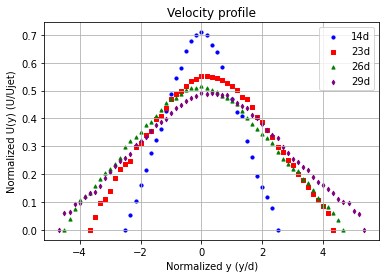

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mt

file_path = 'planerjet_data.csv'

def RemoveNaN(data):
    newData = []
    for i in data:
        if not mt.isnan(i):
            newData.append(i)
    return newData

# Loading CSV file into a DataFrame
df = pd.read_csv(file_path)

# Extracting data from y(col 2) and U(col 6) at x=14d
column_2_data = RemoveNaN(df.iloc[:, 1].values)  # Assuming columns are zero-indexed
column_6_data = RemoveNaN(df.iloc[:, 5].values)

# Extracting data from y(col 9) and U(col 13) at x=23d
column_9_data = RemoveNaN(df.iloc[:, 8].values)
column_13_data = RemoveNaN(df.iloc[:, 12].values)

# Extracting data from y(col 16) and U(col 20) at x=26d
column_16_data = RemoveNaN(df.iloc[:, 15].values)
column_20_data = RemoveNaN(df.iloc[:, 19].values)

# Extracting data from y(col 23) and U(col 27) at x=29d
column_23_data = RemoveNaN(df.iloc[:, 22].values)
column_27_data = RemoveNaN(df.iloc[:, 26].values)

# Normalize x-axis and y-axis values
uj = 50
d = 1.8

column_2_data_normalized = np.array(column_2_data) / d
column_6_data_normalized = np.array(column_6_data) / uj

column_9_data_normalized = np.array(column_9_data) / d
column_13_data_normalized = np.array(column_13_data) / uj

column_16_data_normalized = np.array(column_16_data) / d
column_20_data_normalized = np.array(column_20_data) / uj

column_23_data_normalized = np.array(column_23_data) / d
column_27_data_normalized = np.array(column_27_data) / uj

# Shift x-axis values to have maxima at x=0
column_2_data_normalized -= column_2_data_normalized[np.argmax(column_6_data_normalized)]
column_9_data_normalized -= column_9_data_normalized[np.argmax(column_13_data_normalized)]
column_16_data_normalized -= column_16_data_normalized[np.argmax(column_20_data_normalized)]
column_23_data_normalized -= column_23_data_normalized[np.argmax(column_27_data_normalized)]

# Scatter plot for Column 2 and Column 6 at 14d
plt.scatter(column_2_data_normalized, column_6_data_normalized, marker='o', label='14d', color='b', s=10)

# Scatter plot for Column 9 and Column 13 at 23d
plt.scatter(column_9_data_normalized, column_13_data_normalized, marker='s', label='23d', color='r', s=10)

# Scatter plot for Column 16 and Column 20 at 26d
plt.scatter(column_16_data_normalized, column_20_data_normalized, marker='^', label='26d', color='g', s=10)

# Scatter plot for Column 23 and Column 27 at 29d
plt.scatter(column_23_data_normalized, column_27_data_normalized, marker='d', label='29d', color='purple', s=10)

plt.xlabel('Normalized y (y/d)')
plt.ylabel('Normalized U(y) (U/Ujet)')
plt.title('Velocity profile')
plt.legend()
plt.grid()
plt.show()


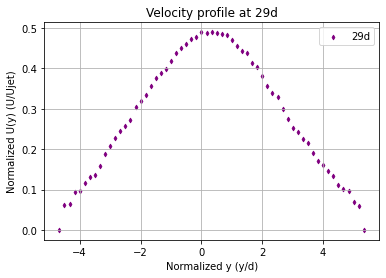

In [23]:
# Scatter plot for Column 23 and Column 27 at 29d
plt.scatter(column_23_data_normalized, column_27_data_normalized, marker='d', label='29d', color='purple', s=10)

plt.xlabel('Normalized y (y/d)')
plt.ylabel('Normalized U(y) (U/Ujet)')
plt.title('Velocity profile at 29d')
plt.legend()
plt.grid()
plt.show()